In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt
from tensorflow.keras import initializers

import numpy as np

## Import data 

In [2]:
df_delta = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_delta_clean.xlsx')

In [3]:
df_delta = df_delta.set_index(['date'])

In [4]:
X = df_delta[['revenue', 'seat_miles', 'load_factor', 'flights']]

In [5]:
y = df_delta['pax_count'].values

## Train & test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

## Normalize the data

In [7]:
scaler = MinMaxScaler()

In [8]:
X_train = scaler.fit_transform(X_train)

In [9]:
X_test = scaler.transform(X_test)

## Creating the model 

In [10]:
model = Sequential()

model.add(Dense(4, activation='relu', 
                #kernel_initializer=initializers.RandomNormal(stddev=0.01),
               # bias_initializer=initializers.Zeros()
               ))
model.add(Dense(8, activation='relu'))
#model.add(Dense(6, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
#model.add(Dense(2, activation='relu'))
model.add(Dense(units=1,activation='relu'))

2022-12-08 23:57:00.725968: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
opt = keras.optimizers.Adam(learning_rate=0.2, beta_1=0.5, beta_2=0.999)

model.compile(loss = 'mean_absolute_error', optimizer= opt)

## Fit the model 

In [12]:
model.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
6/6 [==============================] - 1s 51ms/step - loss: 6618176.5000 - val_loss: 6856733.0000
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 6613544.0000 - val_loss: 6822868.5000
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 6509903.5000 - val_loss: 6409811.5000
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 5677736.5000 - val_loss: 4031757.0000
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 2076186.2500 - val_loss: 394786.0000
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 492161.6250 - val_loss: 785712.1250
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 534862.2500 - val_loss: 383768.1562
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 434578.8438 - val_loss: 376623.2812
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 431270.9688 - val_loss: 655915.3750
Epoch 10/50
6/6 [===========

In [13]:
losses = pd.DataFrame(model.history.history)

In [14]:
losses.head()

,loss,val_loss
0,6618176.50,6856733.0
1,6613544.00,6822868.5
2,6509903.50,6409811.5
3,5677736.50,4031757.0
4,2076186.25,394786.0


<AxesSubplot:>

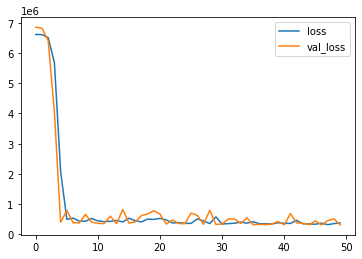

In [15]:
losses.plot()

In [16]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [17]:
model.summary()
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()) # weights
    print("  --Biases: ", layer.get_weights()) # biases
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Layer:  dense
  --Kernels (Weights):  [array([[-0.27756953

### Evaluation 

#### MAE and RMSE

In [18]:
MAE_train = (round(mean_absolute_error(y_train, trainPredict),2))
print("Train Score: %.2f MAE" % (MAE_train))

Train Score: 311023.19 MAE


In [19]:
MAE_test = (round(mean_absolute_error(y_test, testPredict),2))
print("Test Score: %.2f MAE" % (MAE_test))

Test Score: 308916.41 MAE


In [20]:
RMSE_train = math.sqrt(mean_squared_error(y_train, trainPredict))
print("Train Score: %.2f RMSE" % (RMSE_train))

Train Score: 465076.55 RMSE


In [21]:
RMSE_test = math.sqrt(mean_squared_error(y_test, testPredict))
print("Test Score: %.2f RMSE" % (RMSE_test))

Test Score: 493274.55 RMSE


### MAPE 

In [22]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

In [25]:
round(MAPE(y_test, testPredict),2)

33.44

In [26]:
def plot_delta(actual, predictions):
    title = 'Passanger Predictions'
    act = plt.plot(actual, color='blue', label='Actual')
    pred = plt.plot(predictions, color='orange', label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Paxe")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

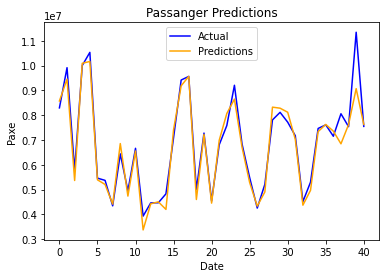

In [27]:
plot_delta(y_test, testPredict)

## Export Forecast

In [28]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Delta Airlines

[Errno 2] No such file or directory: '/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Delta Airlines'
/Users/dilianaserafimova/Source Code/Delta_Airlines


In [29]:
testPredict.tofile('predictions_ffnn.csv')